<a href="https://colab.research.google.com/github/brindaasuri/Unstructured-Data/blob/main/UnstructuredHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

**GROUP MEMBERS:**

Andy Ma

Michael Crosson

Sarah Dominguez

Brinda Asuri

Destin Blanchard

Brooks Li



In [ ]:
!pip install selenium
!pip install google-colab-selenium
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
import google_colab_selenium as gs
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import statsmodels.api as sm
import numpy as np
from scipy import stats

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(sentences):
    filtered_sentences = []
    for sentence in sentences:
        words = sentence.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        filtered_sentence = ' '.join(filtered_words)
        filtered_sentences.append(filtered_sentence)

    return filtered_sentences

In [ ]:
driver = gs.Chrome()
url = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'
driver.get(url)

elements = driver.find_elements("xpath", "//div[contains(@class,'Message') and contains(@class,'userContent')]")
elements2 = driver.find_elements("xpath", "//span[@class='MItem DateCreated']//time")

text = []
for element in elements:
    text.append(element.text)

dates = []
for element in elements2:
    dates.append(element.text)

for i in range(0,100):
  iter = i + 2
  url = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans' + '/p' + str(iter)
  driver.get(url)

  elements = driver.find_elements("xpath", "//div[contains(@class,'Message') and contains(@class,'userContent')]")
  elements2 = driver.find_elements("xpath", "//span[@class='MItem DateCreated']//time")

  for element in elements:
      text.append(element.text)

  for element in elements2:
      dates.append(element.text)

driver.quit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.DataFrame(text, columns=['Sentences'])[0:5000]

df.to_csv('ScrapedData.csv', index=False)

text = remove_stopwords(text)
df['Sentences'] = text[0:5000]
df.to_csv('ScrapedDataMod.csv', index=False)

df2 = pd.read_csv("car_models_and_brands.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'car_models_and_brands.csv'

In [ ]:
car_brands = df2['Brand'].str.lower().unique()
model_to_brand = dict(zip(df2['Model'].str.lower(), df2['Brand'].str.lower()))
results = []

for index, row in df.iterrows():
    sentence = row['Sentences']

    found_brands = set([brand for brand in car_brands if brand in sentence.lower()])
    found_models = [model for model in model_to_brand if model in sentence.lower()]
    found_brands.update([model_to_brand[model] for model in found_models])

    results.append(', '.join(found_brands))

df['Brands'] = results


In [ ]:
all_counts = df.groupby('Brands').count().reset_index().iloc[:,:2]
all_counts.rename(columns = {'Sentences': 'Count'}, inplace = True)

all_counts

,Brands,Count
0,,830
1,acura,40
2,"acura, car, honda",1
3,"acura, car, volkswagen, seat",1
4,"acura, honda",2
...,...,...
1507,volvo,6
1508,"volvo, audi, ford, acura",1
1509,"volvo, chrysler, mercury, mercedes, suzuki, su...",1
1510,"volvo, infiniti, lincoln, acura, bmw, audi",1


In [ ]:
# Split the values in the 'Brands' column and explode them into individual rows
df_1 = df.copy().iloc[0:5000]
df_1['Brands'] = df_1['Brands'].str.split(', ')
df_1 = df_1.explode('Brands')
df_1
# Count the mentions of each brand
df_1['Brands'] = df_1['Brands'].str.strip('.,')
brand_counts = df_1['Brands'].value_counts().reset_index()
brand_counts.rename(columns = {'Brands': 'Brand'}, inplace=True)

In [ ]:
brand_counts

,Brand,count
0,car,2698
1,bmw,1463
2,toyota,1417
3,pontiac,993
4,,830
5,sedan,693
6,acura,621
7,honda,620
8,audi,500
9,infiniti,425


## Task A

In [ ]:
df = pd.DataFrame(text, columns=['Sentences'])[0:5000]
df['Dates'] = dates[0:5000]
df['Sentences']

def clean_text(sentences):
    filtered_sentences = []
    for sentence in sentences:
        words = sentence.split()
        filtered_words = [word.lower() for word in words]
        filtered_words = [word.strip(".,!") for word in words]
        filtered_sentence = ' '.join(filtered_words)
        filtered_sentences.append(filtered_sentence)

    return filtered_sentences

df['Sentences']
text = clean_text(text)
df['Sentences'] = text[0:5000]

In [ ]:
# Concatenate all sentences into one large string
all_words = ' '.join(df['Sentences']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Convert the counts to a DataFrame for easy analysis
frequency_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])\
.sort_values('Frequency', ascending = False)

frequency_df['Rank'] = range(1, len(frequency_df) + 1)

In [ ]:
# Apply log transformation to the predictor variable
X_log = np.log(frequency_df['Rank'])  # Adding 1 to avoid log(0)

# Apply log transformation to the response variable
y_log = np.log(frequency_df['Frequency'])  # Adding 1 to avoid log(0)

# Add a constant to the log-transformed predictor variable
X_log = sm.add_constant(X_log)

model_log = sm.OLS(y_log, X_log).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              Frequency   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 7.737e+05
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:54:00   Log-Likelihood:                 2129.3
No. Observations:               31888   AIC:                            -4255.
Df Residuals:                   31886   BIC:                            -4238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1990      0.012    936.670      0.0

In [ ]:
beta_hat = model_log.params[1]  # Estimated coefficient
beta_0 = -1
SE_beta_hat = model_log.bse[1]

# Calculate the test statistic
t_statistic = (beta_hat - beta_0) / SE_beta_hat

# Degrees of Freedom
dof = 5000 - 1

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), dof))

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Compare p-value to alpha
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The coefficient is statistically different from -1.\n")
else:
    print("Fail to reject the null hypothesis: The coefficient is not statistically different from -1.")


t-statistic: -91.4597259692486
p-value: 0.0
Reject the null hypothesis: The coefficient is statistically different from -1.



<ipython-input-18-bc404313c59f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_hat = model_log.params[1]  # Estimated coefficient
<ipython-input-18-bc404313c59f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SE_beta_hat = model_log.bse[1]


The T-test shows that the coefficient estimate derived from the Zipf's Law regression model is statistically different from -1 based on an alpha value of .05. The average group mean of the coeffecient lies outside the 95% confidence bounds.

## Task B

In [ ]:
nonbrands = ['car', '', 'seat', 'problem', 'sedan']
brand_counts = brand_counts[~brand_counts['Brand'].isin(nonbrands)][0:10]

brand_counts_H = brand_counts[~brand_counts['Brand'].isin(nonbrands)]
#brand counts H is for task H
brand_counts

,Brand,count
1,bmw,1463
2,toyota,1417
3,pontiac,993
6,acura,621
7,honda,620
8,audi,500
9,infiniti,425
10,nissan,390
13,subaru,265
14,ford,255


## Task C

In [ ]:
from itertools import combinations
# Sample dataframes
# Generate all possible pair combinations
pairs = list(combinations(brand_counts['Brand'], 2))

# Initialize pair frequency dictionary
pair_frequency = {pair: 0 for pair in pairs}

# Function to check if two words co-occur within n words of each other
def co_occur_within_n_words(sentence, word1, word2, n):
    words = sentence.split()
    words = [word.strip('.,') for word in words]
    words = [word.lower() for word in words]
    words = [model_to_brand.get(word, word) for word in words]
    for i, word in enumerate(words):
        if word == word1:
          for j in range(max(0, i - n), min(len(words), i + n + 1)):
                if words[j] == word2:
                    return True

In [ ]:
# Update pair frequency based on co-occurrence within 12 words
for combo in pair_frequency.keys():
    for sentence in df['Sentences'].tolist():
      if co_occur_within_n_words(sentence, combo[0], combo[1], 12):
        pair_frequency[combo] += 1

We decided to use a pairwise co-occurrence range of 12 words instead of the range specified in the guidelines. As you will see, this approved the lift values which therefore increased the interpretability of the MDS plot.

In [ ]:
# based on top 10 brands
pair_frequency

{('bmw', 'toyota'): 41,
 ('bmw', 'pontiac'): 6,
 ('bmw', 'acura'): 133,
 ('bmw', 'honda'): 54,
 ('bmw', 'audi'): 127,
 ('bmw', 'infiniti'): 143,
 ('bmw', 'nissan'): 37,
 ('bmw', 'subaru'): 38,
 ('bmw', 'ford'): 22,
 ('toyota', 'pontiac'): 0,
 ('toyota', 'acura'): 18,
 ('toyota', 'honda'): 89,
 ('toyota', 'audi'): 12,
 ('toyota', 'infiniti'): 10,
 ('toyota', 'nissan'): 53,
 ('toyota', 'subaru'): 11,
 ('toyota', 'ford'): 8,
 ('pontiac', 'acura'): 3,
 ('pontiac', 'honda'): 1,
 ('pontiac', 'audi'): 1,
 ('pontiac', 'infiniti'): 1,
 ('pontiac', 'nissan'): 1,
 ('pontiac', 'subaru'): 3,
 ('pontiac', 'ford'): 1,
 ('acura', 'honda'): 67,
 ('acura', 'audi'): 65,
 ('acura', 'infiniti'): 99,
 ('acura', 'nissan'): 27,
 ('acura', 'subaru'): 27,
 ('acura', 'ford'): 5,
 ('honda', 'audi'): 16,
 ('honda', 'infiniti'): 22,
 ('honda', 'nissan'): 66,
 ('honda', 'subaru'): 13,
 ('honda', 'ford'): 7,
 ('audi', 'infiniti'): 57,
 ('audi', 'nissan'): 14,
 ('audi', 'subaru'): 15,
 ('audi', 'ford'): 5,
 ('infiniti

In [ ]:
brand_counts

,Brand,count
1,bmw,1463
2,toyota,1417
3,pontiac,993
6,acura,621
7,honda,620
8,audi,500
9,infiniti,425
10,nissan,390
13,subaru,265
14,ford,255


In [ ]:
from collections import defaultdict
lift = defaultdict(int)

for i in pair_frequency.keys():
    lift[i] = (5000*pair_frequency[i]) / (brand_counts[brand_counts['Brand'] == i[0]]['count'].values[0]*brand_counts[brand_counts['Brand'] == i[1]]['count'].values[0])

for i in lift:
  if lift[i] == 0:
      lift[i] = 1


In [ ]:
lift

defaultdict(int,
            {('bmw', 'toyota'): 0.098887109992856,
             ('bmw', 'pontiac'): 0.02065036251711399,
             ('bmw', 'acura'): 0.7319572536963841,
             ('bmw', 'honda'): 0.29766498357330273,
             ('bmw', 'audi'): 0.8680792891319207,
             ('bmw', 'infiniti'): 1.1499336576735957,
             ('bmw', 'nissan'): 0.3242371663424295,
             ('bmw', 'subaru'): 0.490075961774075,
             ('bmw', 'ford'): 0.2948547840188707,
             ('toyota', 'pontiac'): 1,
             ('toyota', 'acura'): 0.10227772493428657,
             ('toyota', 'honda'): 0.5065221845334305,
             ('toyota', 'audi'): 0.08468595624558928,
             ('toyota', 'infiniti'): 0.08302544729959732,
             ('toyota', 'nissan'): 0.47952517959575125,
             ('toyota', 'subaru'): 0.1464694211794783,
             ('toyota', 'ford'): 0.1107005963994631,
             ('pontiac', 'acura'): 0.02432486341589192,
             ('pontiac', 'honda'): 0.0

In [ ]:
top10 = brand_counts['Brand'].tolist()
# transformed dictionary of lift values to lift matrix
df_lifts = pd.DataFrame(columns=top10,index=top10)
for brand in top10:
    df_lifts[brand][brand] = '-'
for brands in lift:
    a,b = brands
    df_lifts[a][b] = (lift[brands])
    df_lifts[b][a] = '-'


# Add 0.2 to correlation values less than 0.1 (for normalization purposes)
for i in df_lifts.index:
    for j in df_lifts.columns:
        if df_lifts.at[i, j] != '-' and df_lifts.at[i, j] < 0.1:
            df_lifts.at[i, j] += 0.2

df_lifts

,bmw,toyota,pontiac,acura,honda,audi,infiniti,nissan,subaru,ford
bmw,-,-,-,-,-,-,-,-,-,-
toyota,0.298887,-,-,-,-,-,-,-,-,-
pontiac,0.22065,1,-,-,-,-,-,-,-,-
acura,0.731957,0.102278,0.224325,-,-,-,-,-,-,-
honda,0.297665,0.506522,0.208121,0.870085,-,-,-,-,-,-
audi,0.868079,0.284686,0.21007,1.046699,0.258065,-,-,-,-,-
infiniti,1.149934,0.283025,0.211848,1.875533,0.417457,1.341176,-,-,-,-
nissan,0.324237,0.479525,0.212911,0.557414,1.364764,0.358974,0.723982,-,-,-
subaru,0.490076,0.146469,0.257003,0.820345,0.395618,0.566038,0.665927,0.435414,-,-
ford,0.294855,0.110701,0.219746,0.157873,0.221379,0.196078,0.230681,0.301659,0.517943,-


## Task D

MDS Map

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


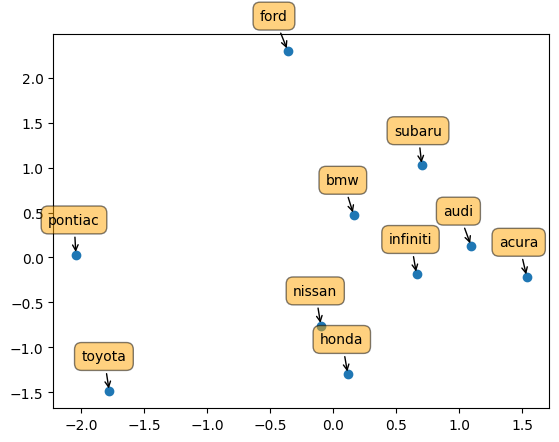

In [ ]:
import matplotlib.pyplot as plt
from sklearn import manifold
import numpy as np
import pandas as pd

#Create the dissimilarity matrix (inverse of lift values)
dissimilarity_matrix = df_lifts.replace('-', np.nan)  # Replace '-' with NaN for easier numeric processing
dissimilarity_matrix = 1 / dissimilarity_matrix  # Inverse of lift represents dissimilarity

#Fill NaNs with a high dissimilarity value (e.g., 1) where lift is missing
dissimilarity_matrix = dissimilarity_matrix.fillna(1)

#Ensure the matrix is symmetric by averaging (i, j) and (j, i)
dissimilarity_matrix = (dissimilarity_matrix + dissimilarity_matrix.T) / 2

#Perform MDS
seed = 4 #np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

#Plotting the MDS results
plt.subplots_adjust(bottom=0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker='o')

# Label the points with the brand names
for label, x, y in zip(top10, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()

## Task E


From part C and D, there are a few insights that can be offered from the analyses. All of the data that we scraped was from the year 2002, so we noticed some more interesting results in comparison to what we would've expected in the year 2024:



**Ford’s Strong Position:**
Ford stands out positively in the market, showing strong consumer sentiment compared to other brands. This suggests that Ford is a preferred choice among entry-level luxury car buyers. JD Power can advise Ford to continue highlighting its strengths, such as advanced technology or great driving experience, to maintain its strong market position.

---

**Pontiac as an outlier:**
Pontiac is seen as an outlier due to its distinct positioning and lower sentiment compared to other brands like Toyota. Although Pontiac is not a major player in the current luxury market, it still appeals to a niche group of consumers. JD Power can explore what makes Pontiac resonate with this audience and advise other brands on how to leverage similar unique appeals, such as nostalgic value.

---

**Clustering of Key Luxury Brands:**
Brands like BMW, Audi, Acura, and Infiniti are closely grouped, suggesting they are direct competitors often considered together by consumers. JD Power can recommend that these brands focus on differentiating themselves by emphasizing unique features, quality, or specific value propositions that make them stand out in the crowded luxury market.

---

**Toyota’s Neutral Position:**
Toyota occupies a neutral spot in the market, appealing to a broader audience that doesn’t align as strongly with traditional luxury brands. JD Power could suggest that Toyota enhance its luxury features or highlight its models’ unique aspects to better compete with higher-end brands like BMW and Audi.

---

**Strong Competition Among Acura, Infiniti, and Audi:**
Acura, Infiniti, and Audi show strong associations in consumer perception, indicating that they are viewed as close competitors. JD Power can advise these brands to focus on what makes them unique through targeted marketing that highlights specific strengths or benefits, helping them stand out and attract loyal customers.

---

**Market Competition and Brand Pressure:**
There is intense competition among luxury brands, especially for those closely grouped like BMW and Audi. JD Power can recommend that these brands continue to innovate, improve customer service, and highlight unique features to keep their market position strong.

---

These insights can help JD Power provide valuable advice to automotive brands on how to better position themselves, differentiate their offerings, and appeal to consumers in the competitive entry-level luxury car market.

## Task F

In [ ]:
import pandas as pd
from collections import Counter

#define a list of potential car attributes/features to check in discussions
car_attributes = ['performance', 'reliability', 'comfort', 'safety', 'design', 'technology', 'fuel efficiency', 'speed', 'handling', 'price', 'durability', 'luxery', 'interior', 'exterior', 'warranty', 'resale value', 'sound system', 'ride quality', 'acceleration', 'transmission']

#count frequency of each attribute in the 'Sentences' column
def count_attributes(sentences, attributes):
    attribute_counter = Counter()

    for sentence in sentences:
        words = sentence.lower().split()
        for attribute in attributes:
            if attribute.lower() in words:
                attribute_counter[attribute.lower()] += 1

    return attribute_counter

#count the frequency of each attribute in the discussions
attribute_counts = count_attributes(df['Sentences'], car_attributes)

#identify the top 5 most mentioned attributes
top_5_attributes = dict(attribute_counts.most_common(5))

print("Top 5 most frequently mentioned car attributes:")
for attr, count in top_5_attributes.items():
    print(f"{attr.capitalize()}: {count} mentions")


#determine the association between these top 5 attributes and the 5 car brands
top_brands = ['bmw', 'audi', 'acura', 'infiniti', 'toyota']

#initialize a dictionary to store the attribute-brand association counts
attribute_brand_association = {attribute: {brand: 0 for brand in top_brands} for attribute in top_5_attributes}

#count the co-occurrence of each attribute with each brand in the sentences
for index, row in df.iterrows():
    sentence = row['Sentences'].lower()  # Convert sentence to lowercase that way everything is the same
    brands_in_sentence = [brand for brand in top_brands if brand in sentence]  # Find mentioned brands in sentence


    #checking occurrence of attributes in the sentence
    for attribute in top_5_attributes.keys():
        if attribute in sentence:
            #for each brand found in the sentence, increment the corresponding count
            for brand in brands_in_sentence:
                attribute_brand_association[attribute][brand] += 1


#displaying the attribute-brand association, basically pairing the top five attributes to the top five brands
print("\nAssociation of top 5 attributes with the 5 car brands:")
for attribute, brand_assoc in attribute_brand_association.items():
    print(f"\nAttribute: {attribute.capitalize()}")
    for brand, count in brand_assoc.items():
        print(f"  {brand.capitalize()}: {count} mentions")


#calculate lift values for each attribute brand pair

# Calculate total number of sentences
total_sentences = len(df)

# Calculate the probability of each attribute appearing
attribute_probabilities = {attr: count / total_sentences for attr, count in top_5_attributes.items()}

# Calculate the probability of each brand appearing
brand_counts = Counter()
for sentence in df['Sentences']:
    words = sentence.lower().split()
    for brand in top_brands:
        if brand in words:
            brand_counts[brand] += 1

brand_probabilities = {brand: count / total_sentences for brand, count in brand_counts.items()}

# Calculate lift values for each attribute-brand pair
lift_values = {attribute: {brand: (count / total_sentences) / (attribute_probabilities[attribute] * brand_probabilities[brand])
                           if attribute_probabilities[attribute] > 0 and brand_probabilities[brand] > 0 else 0
                           for brand, count in brand_assoc.items()}
               for attribute, brand_assoc in attribute_brand_association.items()}

# Display the lift values
print("\nLift values for attribute-brand associations:")
for attribute, brands in lift_values.items():
    print(f"\nAttribute: {attribute.capitalize()}")
    for brand, lift in brands.items():
        print(f"  {brand.capitalize()}: Lift = {lift:.2f}")




Top 5 most frequently mentioned car attributes:
Performance: 623 mentions
Price: 408 mentions
Handling: 370 mentions
Interior: 331 mentions
Speed: 234 mentions

Association of top 5 attributes with the 5 car brands:

Attribute: Performance
  Bmw: 260 mentions
  Audi: 73 mentions
  Acura: 101 mentions
  Infiniti: 83 mentions
  Toyota: 15 mentions

Attribute: Price
  Bmw: 227 mentions
  Audi: 77 mentions
  Acura: 78 mentions
  Infiniti: 67 mentions
  Toyota: 24 mentions

Attribute: Handling
  Bmw: 173 mentions
  Audi: 39 mentions
  Acura: 56 mentions
  Infiniti: 36 mentions
  Toyota: 8 mentions

Attribute: Interior
  Bmw: 120 mentions
  Audi: 62 mentions
  Acura: 52 mentions
  Infiniti: 45 mentions
  Toyota: 10 mentions

Attribute: Speed
  Bmw: 137 mentions
  Audi: 47 mentions
  Acura: 53 mentions
  Infiniti: 36 mentions
  Toyota: 12 mentions

Lift values for attribute-brand associations:

Attribute: Performance
  Bmw: Lift = 1.94
  Audi: Lift = 2.35
  Acura: Lift = 2.14
  Infiniti: Lift

## Task G

The initial insight we could offer our client is that performance is the most commonly used word overall by a large margin, followed by price, handling, and interior in a second tier. The frequecies of these words indicate that they are focal points in the consumer community.

Depending on the client, further advice we would offer would vary. For example, if the client is BMW, we could inform them that they are the most popular brand, and that they are associated with Price and Speed over 50% of the time those words appear. This association means that customers mention BMW over 50% of the time they are touching on those topics. BMW may want to focus on cementing their popularity regarding Price and Speed, or they may want to focus on improving the other qualities they are not as associated with. If the client is Acura, we could advise them that the only segment they are less popular than is Audi, a close competitor, is the Interior aspect. The biggest positive gaps for Acura over Audi are in Performance and Handling. We could present these insights to Acura and, depending on their strategies and goals, we could advise them to focus on their strengths or weaknesses.

## Task H

Aspirational Brands

In [ ]:
aspiration_list = ['want car', 'need car', 'saving car', 'wish had', 'wait get', 'plan buy', 'getting car', 'love own', 'save enough', 'hope buy', 'want buy', 'saving money', 'really want', 'dream car', 'aspire buy', 'looking buy', 'purchase car', 'buy car', 'need car', 'looking buy', 'need car', 'can afford']

In [ ]:
aspirations = pd.DataFrame(aspiration_list)
aspirations.columns=['bigrams']
aspirations

,bigrams
0,want car
1,need car
2,saving car
3,wish had
4,wait get
5,plan buy
6,getting car
7,love own
8,save enough
9,hope buy


In [ ]:
def asp_word_replace(comment):
    for i in aspirations['bigrams'].index.values:
        comment = comment.lower().replace(aspirations['bigrams'][i],'aspiration')
    return comment


In [ ]:
!pip install nltk # install the nltk library
import nltk # import the nltk library
nltk.download('punkt') # download the 'punkt' resource


df["comments_replace"] = df["Sentences"].apply(asp_word_replace)

from nltk.tokenize import word_tokenize

def tokenize_and_remove_stopwords(comment):
    tokens = word_tokenize(comment)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

df["tokenized_comments"] = df["comments_replace"].apply(tokenize_and_remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#checks if two words co-occur within n words of each other
from collections import defaultdict

# Function to check if two words co-occur within n words of each other
def co_occur_within_n_words(sentence, word1, word2, n):
    words = sentence.split()
    words = [word.strip('.,') for word in words]
    words = [word.lower() for word in words]

    for word in words:
        if word == word1:
            for word in words:
                if word == word2:
                  return True
    return False


#all possible pairs of brands and aspirational words
all_brands = brand_counts_H['Brand'].tolist()
# all_aspirations = aspirations['bigrams'].tolist()
pairs = [(brand, "aspiration") for brand in all_brands]

#pair frequency dictionary
pair_frequency = {pair: 0 for pair in pairs}

#pair frequency based on co-occurrence
count = 0
for combo in pair_frequency.keys():
    for sentence in df['comments_replace'].tolist():
        if co_occur_within_n_words(sentence, combo[0], combo[1], 1000):
            pair_frequency[combo] += 1

#lift scores
lift = defaultdict(float)
for pair in pair_frequency:
    brand, aspiration = pair
    aspiration_count = df['comments_replace'].str.contains(aspiration).sum()
    if aspiration_count > 0:
        lift[pair] = (5000 * pair_frequency[pair]) / (brand_counts_H[brand_counts_H['Brand'] == brand]['count'] * aspiration_count)

#lift scores
totals = {}
for pair, score in lift.items():
    pair = str(pair).split()[0].strip("(").strip(",")
    totals[pair] = str(score).split()[1]

df_tot = pd.DataFrame(totals.items(), columns=['Brand', 'Aspiration'])
df_tot


,Brand,Aspiration
0,'bmw',1.05158
1,'toyota',0.049351
2,'pontiac',0.0
3,'acura',0.619348
4,'honda',0.338371
5,'audi',0.48951
6,'infiniti',0.987248
7,'nissan',0.717231
8,'subaru',0.263887
9,'ford',0.274236


To find the most aspirational brands, we first created a list of aspirational bigrams that do not include any stop words. Then, we replaced the word tuples or bigrams with the word aspiration. This made it easier to associate each brand with the word aspiration and find their lift values.

BMW has the highest lift score, meaning that individuals find it the most aspirational in the dataset. This means that BMW is spoken about in aspirational contexts and individuals want to buy or own the brand. This may indicate that BMW is more of a luxurious car that people aspire to own. Cars with high lift values should continue to position themselves as luxurious. Infiniti closely follows, and given that this data is from 2002, its high lift value makes sense. On the lower side, Toyota, Subaru, and Ford have the lowest values meaning that they have less aspirational words associated with their brands. These brands may want to appeal its higher end models to have more apirational lift values. For example Toyota's Land Cruser or Supra model could benefit from an increase in aspirational campaigns. These brands could also focus more on other aspects of their models, such as safety or adventure.